In [11]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import datetime

In [23]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = ''
#exp_name = '2018_01_11_12_48_11_cs-readout-test'
if not exp_name:
    exp_date = datetime.datetime.now().strftime("%Y_%m_%d")
    search_path = os.path.join(dp, exp_date)
    exp_name = os.listdir(search_path)[-1]
    print exp_name
else:    
    exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)

2018_01_17_15_49_33_cs-background


In [24]:
q.experiments[0]['variable_list']

[]

In [25]:
sig_data = q.experiments[0]['iterations'][0]['signal_data']
shots = len(sig_data[0])
max_sig = np.max(sig_data.astype('int32').flatten())
binned_data = np.zeros((shots, max_sig+1))
bins = range(max_sig+2)
for s in range(shots):
    binned_data[s] = np.histogram(sig_data[:, s], bins=bins, normed=True)[0]
    
means = np.mean(sig_data, axis=0)

<IPython.core.display.Javascript object>


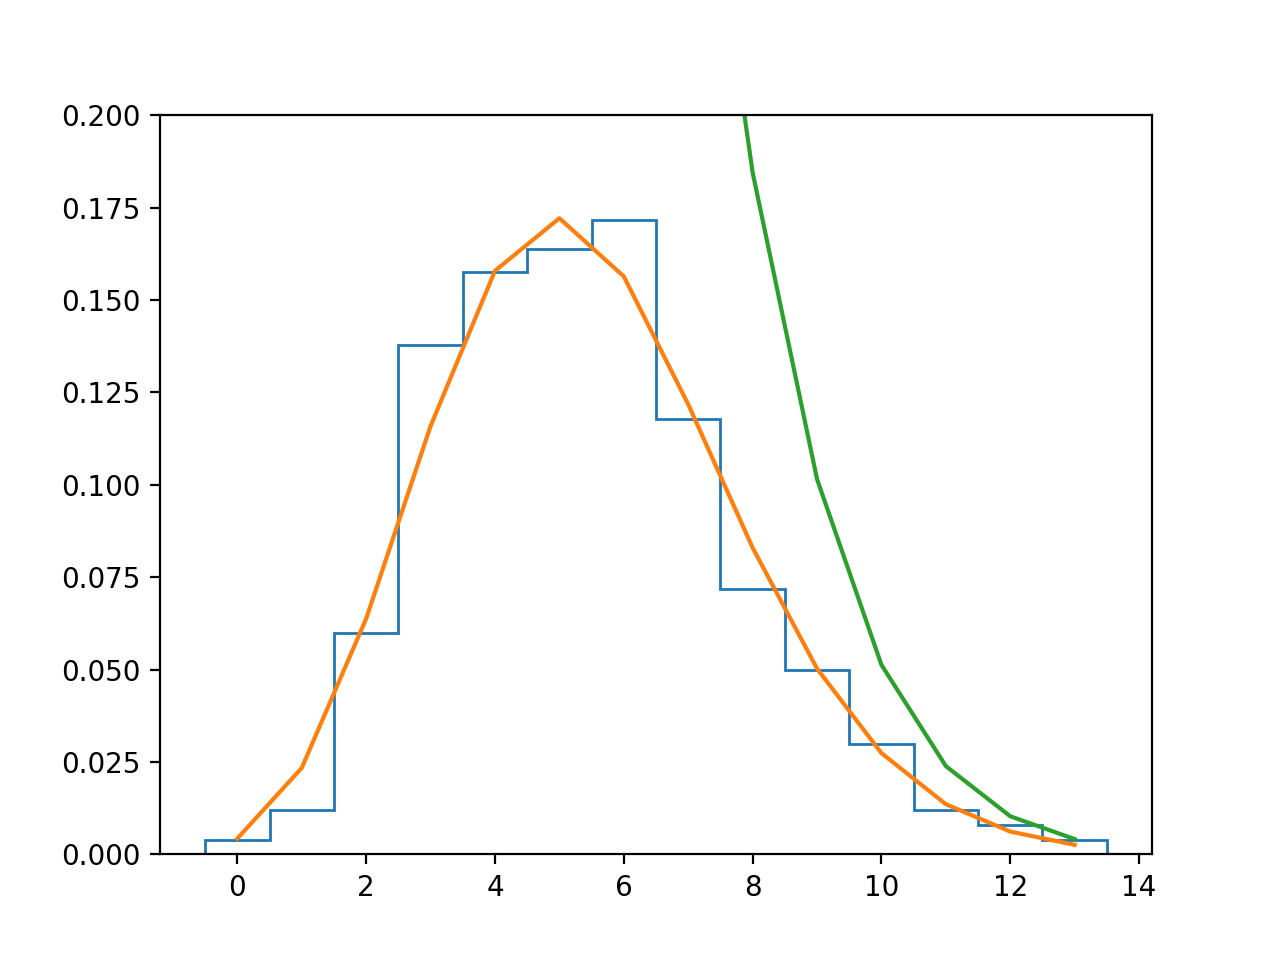

fidelity = 0.995859692663 for threshold = 13


In [26]:
s=0
fig, ax = plt.subplots()
ax.hist(sig_data[:,s], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
ax.plot(xs, poisson.pmf(xs, means[s]))
ax.plot(xs, 1-poisson.cdf(xs-1, means[s]))
ax.set_ylim(0, 0.2)
fidelity = 0.995
c = int(means[s])
while True:
    c += 1
    if poisson.cdf(c-1, means[s]) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, means[s]), c)
        break

<IPython.core.display.Javascript object>


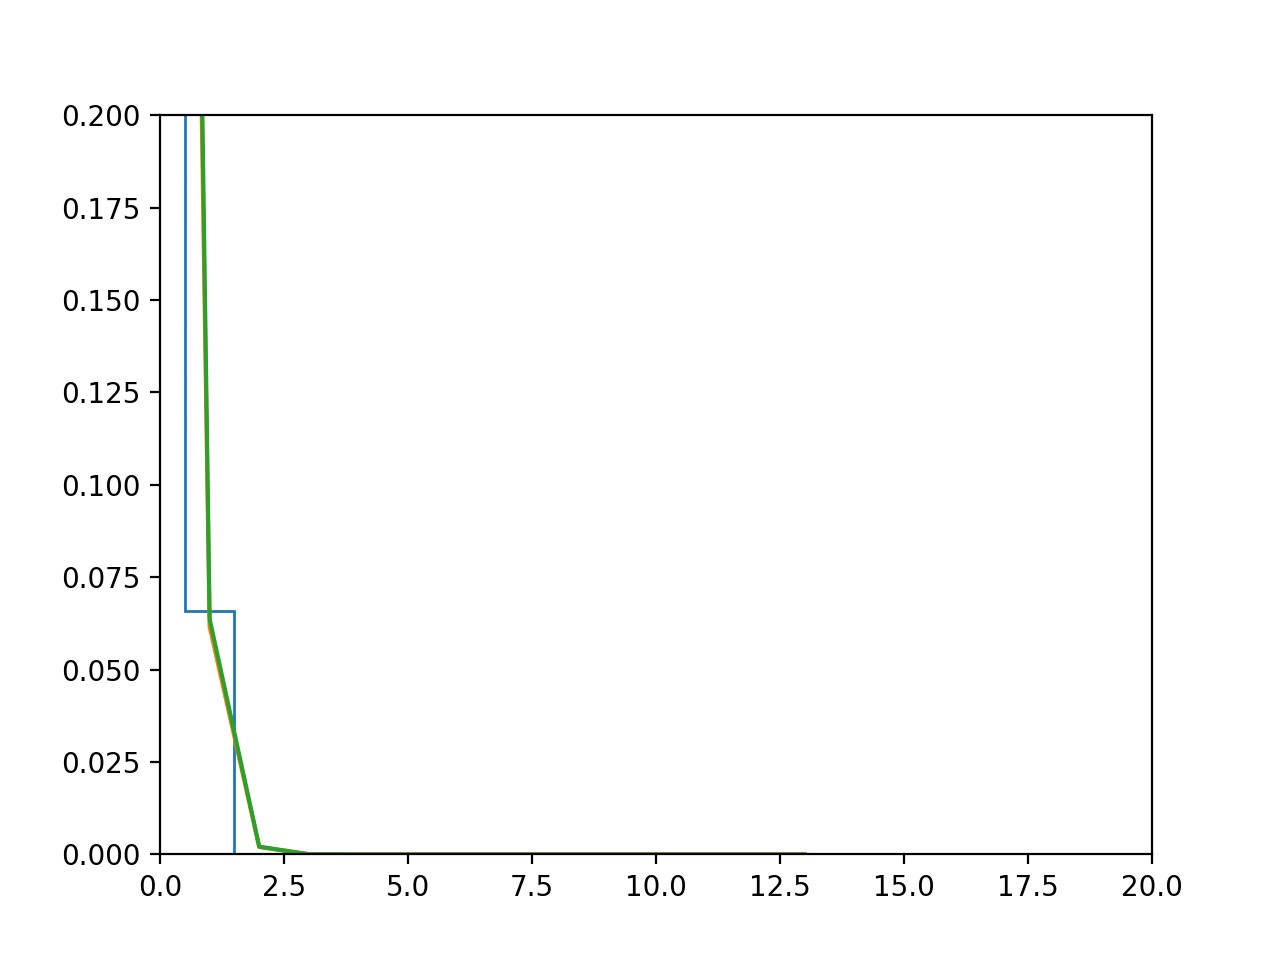

fidelity = 0.997923633041 for threshold = 2


In [27]:
s=1
fig, ax = plt.subplots()
ax.hist(sig_data[:,s], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
ax.plot(xs, poisson.pmf(xs, means[s]))  # 250 cps SPCM background
#ax.plot(xs, poisson.pmf(xs, means[s]-0.2*1))  # 50 cps SPCM background
ax.plot(xs, 1-poisson.cdf(xs-1, means[s]))
#ax.plot(xs, 1-poisson.cdf(xs-1, means[s]-0.2*3))
#ax.plot(xs, 1-poisson.cdf(xs-1, means[s]))
ax.set_ylim(0, 0.2)
ax.set_xlim(0,20)

fidelity = 0.995
c = int(means[s])
while True:
    c += 1
    if poisson.cdf(c-1, means[s]) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, means[s]), c)
        break

In [28]:
means/[2,0.5]

array([ 2.7255489 ,  0.13173653])